In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#  Correlation Analysis

Let's visualize the correlation matrix to identify redundant features. High correlation may indicate multicollinearity, which can affect model performance.




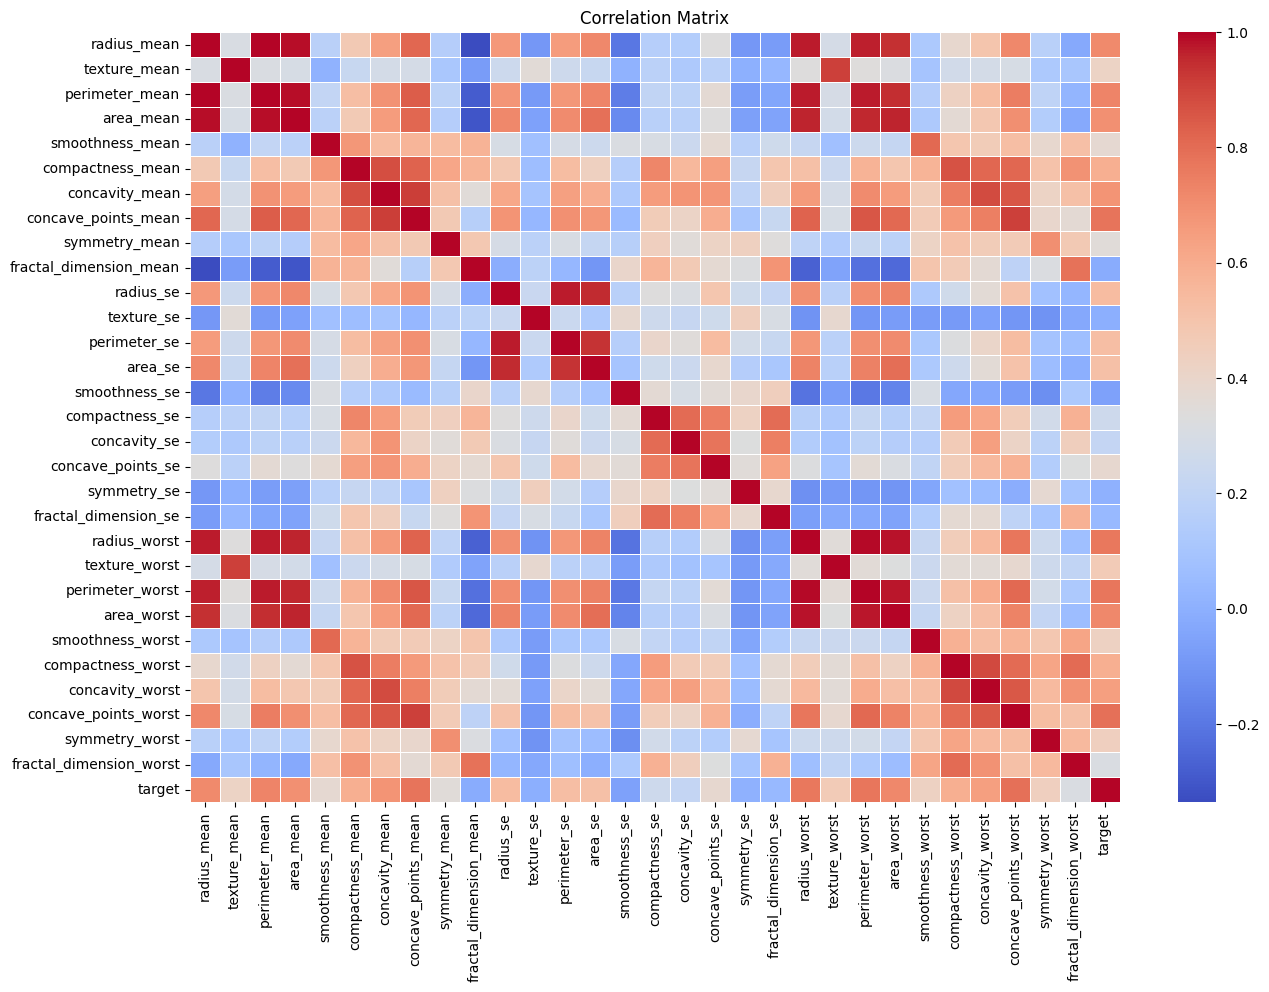

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


import pandas as pd
X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train_df['target'] = y_train.values


plt.figure(figsize=(15,10))
sns.heatmap(X_train_df.corr(), cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


# The model showed many variables with correlation; therefore, we decided to check on deeply:



# Feature Scaling and PCA

Since we observed strong correlation between many features, we will use Principal Component Analysis (PCA) to reduce the feature space while retaining most of the variance.


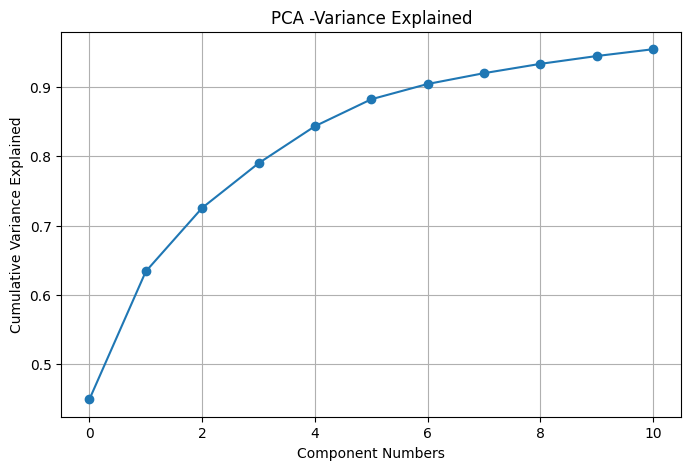

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Component Numbers')
plt.ylabel('Cumulative Variance Explained')
plt.title('PCA -Variance Explained')
plt.grid(True)
plt.show()


We will now evaluate the model performance using Random Forest trained on the PCA-transformed data.


# Model Training and Evaluation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Separar variáveis preditoras (X) e alvo (y)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Treinar modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Avaliar
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        43

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_pca, y, cv=5, scoring='accuracy')
print(f"Accuracies per fold: {scores}")
print(f"Mean: {scores.mean():.4f} | Standard Deviation: {scores.std():.4f}")


Accuracies per fold: [0.97368421 1.         1.         0.99122807 0.99115044]
Mean: 0.9912 | Standard Deviation: 0.0096


In [ ]:
X_scaled_original = scaler.fit_transform(df)  # df sem target
scores_original = cross_val_score(clf, X_scaled_original, y, cv=5, scoring='accuracy')

print(f"Accuracy without PCA: {scores_original}")
print(f"Mean: {scores_original.mean():.4f}")


Accuracy without PCA: [1. 1. 1. 1. 1.]
Mean: 1.0000


We also test Logistic Regression, a simpler and interpretable model, to compare against the Random Forest results.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Logistic Regression with PCA-transformed data
logreg_pca = LogisticRegression(max_iter=1000, random_state=42)
scores_pca = cross_val_score(logreg_pca, X_pca, y, cv=5, scoring='accuracy')

print("Logistic Regression with PCA:")
print(f"Accuracies per fold: {scores_pca}")
print(f"Mean: {scores_pca.mean():.4f} | Standard Deviation: {scores_pca.std():.4f}")


Logistic Regression with PCA:
Accuracies per fold: [1.         1.         1.         0.99122807 1.        ]
Mean: 0.9982 | Standard Deviation: 0.0035


In [ ]:
# Standardize original features again
X_scaled_original = scaler.fit_transform(df)

# Logistic Regression with original features
logreg_original = LogisticRegression(max_iter=1000, random_state=42)
scores_original = cross_val_score(logreg_original, X_scaled_original, y, cv=5, scoring='accuracy')

print("\nLogistic Regression without PCA:")
print(f"Accuracies per fold: {scores_original}")
print(f"Mean: {scores_original.mean():.4f} | Standard Deviation: {scores_original.std():.4f}")



Logistic Regression without PCA:
Accuracies per fold: [1.         1.         1.         0.99122807 1.        ]
Mean: 0.9982 | Standard Deviation: 0.0035


# Results and Comparison

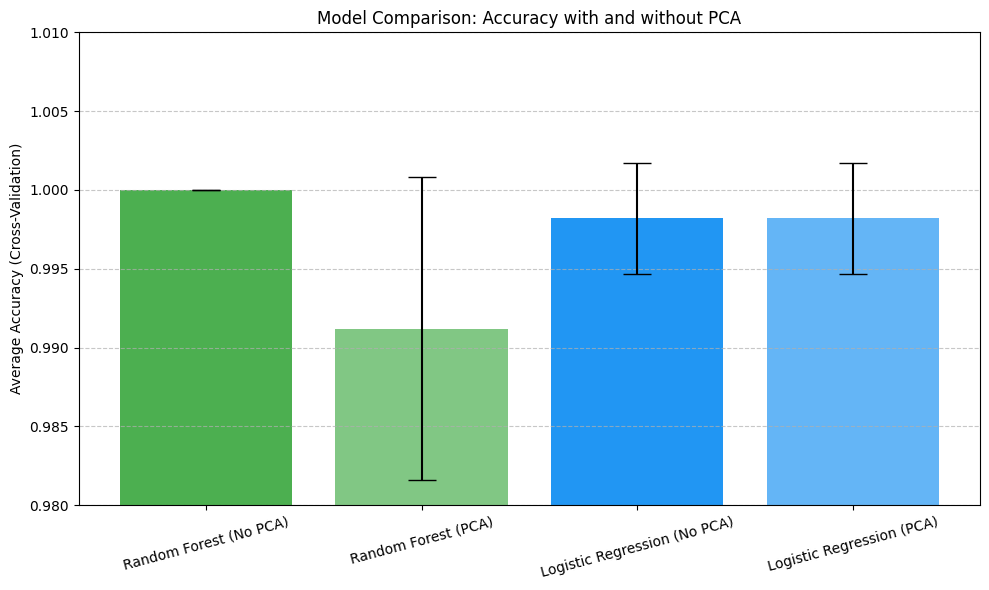

In [ ]:
# Model labels
models = [
    'Random Forest (No PCA)',
    'Random Forest (PCA)',
    'Logistic Regression (No PCA)',
    'Logistic Regression (PCA)'
]

# Mean accuracies
means = [1.0000, 0.9912, 0.9982, 0.9982]

# Standard deviations
stds = [0.0000, 0.0096, 0.0035, 0.0035]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, means, yerr=stds, capsize=10,
               color=['#4CAF50', '#81C784', '#2196F3', '#64B5F6'])

plt.ylim(0.98, 1.01)
plt.ylabel('Average Accuracy (Cross-Validation)')
plt.title('Model Comparison: Accuracy with and without PCA')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Conclusion

This project showed that even with dimensionality reduction via PCA, model performance remained excellent. This indicates that the original dataset contains significant redundancy. Both Random Forest and Logistic Regression achieved high accuracy, reinforcing the reliability of PCA as a tool for simplification without performance loss.
